# Exploratory Data Analysis

## Wine Reviews Data Set

This dataset contains various reviews of the wine given by various wine tasters. Based on the taste of the wine, the wine taster has given the rating which has a range of 1 to 100(100 being the upper Limit).

The data consists of 10 fields:

- **Points:** the number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score >=80)

- **Title:** the title of the wine review, which often contains the vintage if you're interested in extracting that feature

- **Variety:** the type of grapes used to make the wine (ie Pinot Noir)

- **Description:** a few sentences from a sommelier describing the wine's taste, smell, look, feel, etc.

- **Country:** the country that the wine is from

- **Province:** the province or state that the wine is from

- **Region 1:** the wine growing area in a province or state (ie Napa)

- **Region 2:** sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank

- **Winery:** the winery that made the wine

- **Designation:** the vineyard within the winery where the grapes that made the wine are from

- **Price:** the cost for a bottle of the wine

- **Taster Name:** name of the person who tasted and reviewed the wine

- **Taster Twitter Handle:** Twitter handle for the person who tasted and reviewed the wine

The current dataset is uniform with some null values which could affect the analysis. Therefore, cleaning needs to be done before EDA.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn  as sns
import warnings
warnings.filterwarnings('ignore')
import csv

In [2]:
#Read CSV File
wine = pd.read_csv("wine_reviews.csv")
wine.head(20)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


The dataset contains few empty fields which will affect the calculation.
To avoid this, we need to remove the empty fields as follows:

### Data Cleaning

In [3]:
#Check Whether there are any spaces in between the column names
wine.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

Columns are perfectly defined that is there are no spaces in between or at the end of the column names.
Hence no need to modify column names.

In [4]:
#Check whether there are any null values present in the dataset
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 10 columns):
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 11.5+ MB


From the info method we can see that some of the data is missing in some of the columns.
Hence we need to delete the rows that has incomplete data.
There are various null values present in the colum 'region_2' which would affect the analysis.
To avoid this we need to drop the column.

In [5]:
wr1= wine.drop(['region_2','region_1'],axis=1)
wr1

,country,description,designation,points,price,province,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Pinot Noir,Blue Farm


In [6]:
wd=wr1.dropna()
wd

,country,description,designation,points,price,province,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Pinot Noir,Blue Farm


*Check Whether there are any duplicate rows present in the dataset.*

In [7]:
wd.duplicated()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
150889     True
150890     True
150892     True
150894     True
150897     True
150899     True
150900     True
150901     True
150902     True
150903     True
150905     True
150906     True
150907     True
150908     True
150909     True
150911     True
150912     True
150914     True
150915     True
150916     True
150917     True
150918     True
150919     True
150920     True
150921     True
150923     True
150924     True
150926     True
150927     True
150928     True
Length: 94919, dtype: bo

In [8]:
wd.shape

(94919, 8)

In [9]:
wr= wd.drop_duplicates()
wr

,country,description,designation,points,price,province,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Pinot Noir,Blue Farm


Duplicates removed

In [10]:
wr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61493 entries, 0 to 149635
Data columns (total 8 columns):
country        61493 non-null object
description    61493 non-null object
designation    61493 non-null object
points         61493 non-null int64
price          61493 non-null float64
province       61493 non-null object
variety        61493 non-null object
winery         61493 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 4.2+ MB


We can see that null values have been removed.
Hence the data is clean and the analysis can be done.

In [11]:
wr.shape

(61493, 8)

In [12]:
wr[['variety','winery','points','price']].head(50)

,variety,winery,points,price
0,Cabernet Sauvignon,Heitz,96,235.0
1,Tinta de Toro,Bodega Carmen Rodríguez,96,110.0
2,Sauvignon Blanc,Macauley,96,90.0
3,Pinot Noir,Ponzi,96,65.0
4,Provence red blend,Domaine de la Bégude,95,66.0
5,Tinta de Toro,Numanthia,95,73.0
6,Tinta de Toro,Maurodos,95,65.0
7,Tinta de Toro,Bodega Carmen Rodríguez,95,110.0
8,Pinot Noir,Bergström,95,65.0
9,Pinot Noir,Blue Farm,95,60.0


**Summary after Data Cleaning: **

Before cleaning the data, there were 150930 entries. Since there were so many duplicate rows and empty fields, analysis of data that has various anomolies is pointless and will affect the calculations. To avoid that we need to clean the data that is remove the duplicate fields and also the rows that has blank values.
After cleaning the data, currently there are 61493 rows that has no duplicates and blank values.
Hence the data can be visualized using various plots.

### Data Visualization using various Plots

##### Distribution Plot 

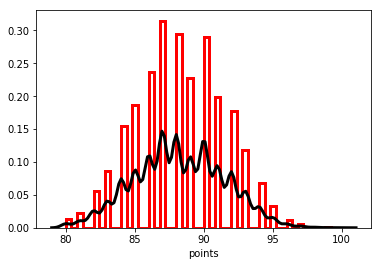

In [13]:
sns.distplot(wr['points'],hist_kws={"histtype": "step", "linewidth": 3,
...                             "alpha": 1, "color": "r"},kde_kws={"color": "k", "lw": 3})
plt.rcParams['figure.figsize']=(10,12)

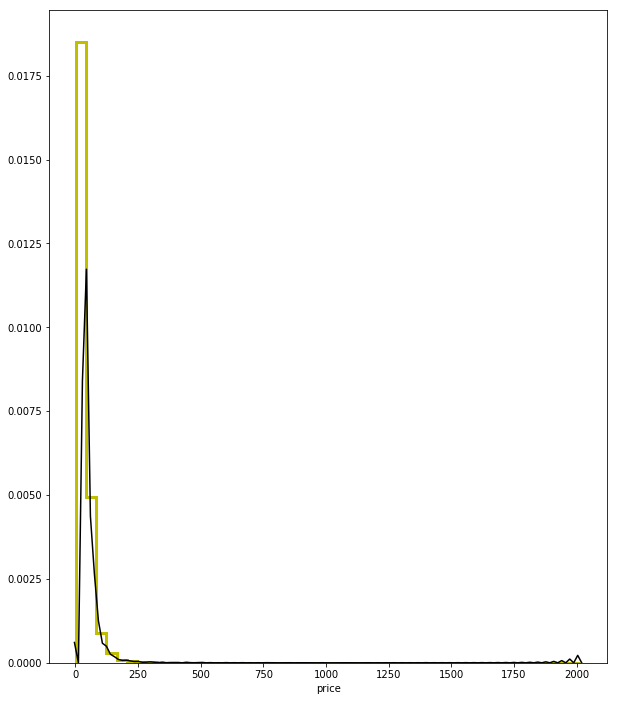

In [14]:
sns.distplot(wr['price'],hist_kws={"histtype": "step", "linewidth": 3,
...                             "alpha": 1, "color": "y"},color='black') 
plt.rcParams['figure.figsize']=(12,15)

From the distribution plot we can infer that:

- The Distribution plot of points has high probablity between 87 and 91. Hence, most the wines has got the points between this range. The density is maximum for 87 which means most of points given by the critics are close to 87.
- The Distribution plot of price is analogous since there are various outliers present in the dataset. The probablity is almost uniformly distributed and has maximum probablity between 0 and 100. This means that most the wine will have price range of 0-100.

#### Histogram 

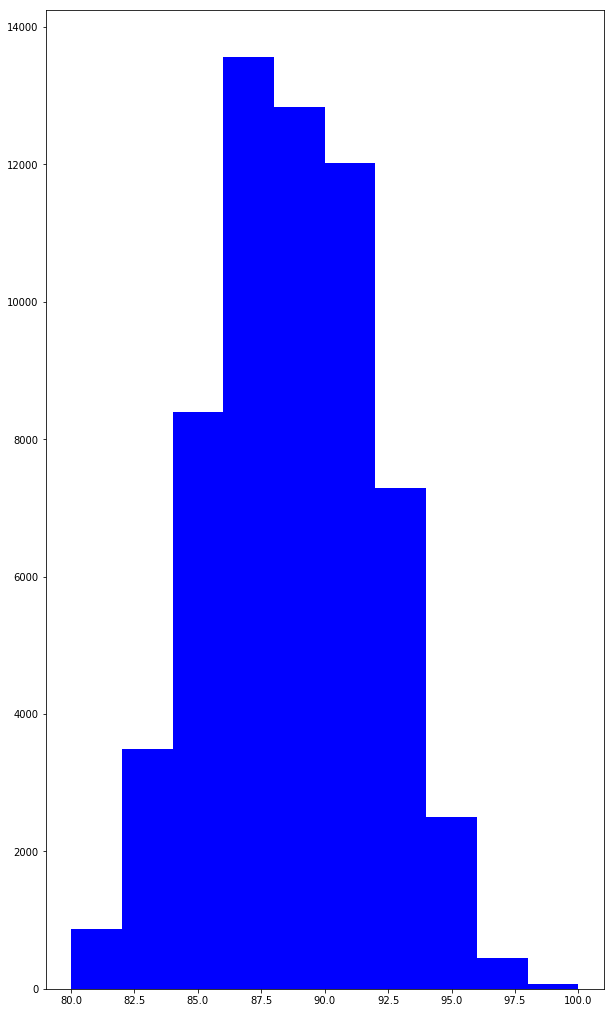

In [16]:
plt.hist(wr['points'],color="blue")
plt.rcParams['figure.figsize']=(10,18)

From the histogram plot we can infer that almost 13500 critics has given rating approximately equal to 87 which is the maximum density we can obtain from the plot. The range of points given by the critics is 80-100, 80 being the minimum and 100 maximum. 

#### Bar Plot 

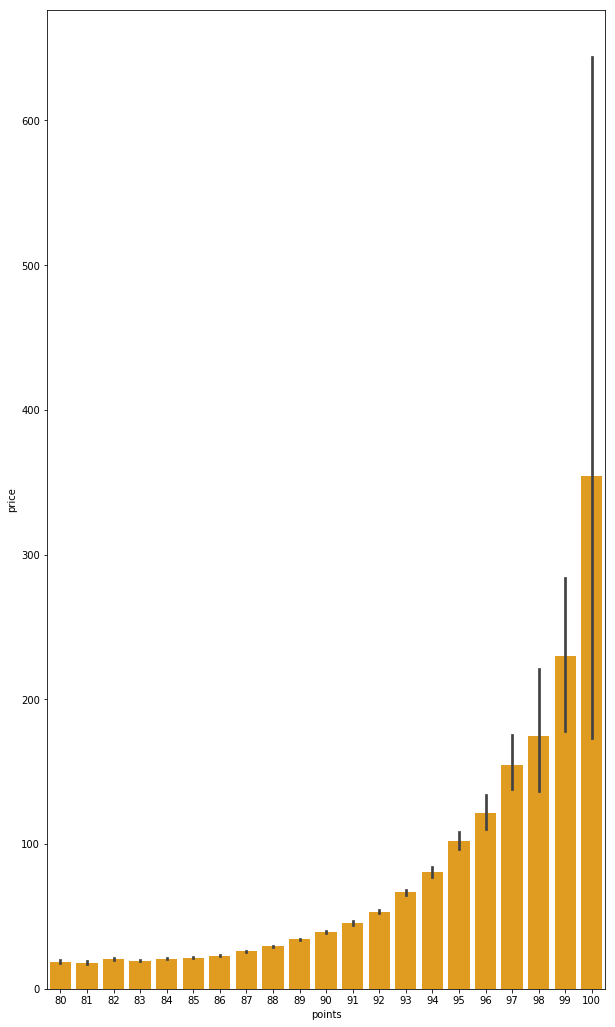

In [17]:
sns.barplot(x="points", y="price",color='orange',data=wr)
plt.rcParams['figure.figsize']=(20,18)

From the bar plot we can conclude that price and points are directly proportional to each other. Although it can be wrong but from the data it we can clearly see that the wine that which is costlier has got good reviews.

#### Point Plot 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]), <a list of 41 Text xticklabel objects>)

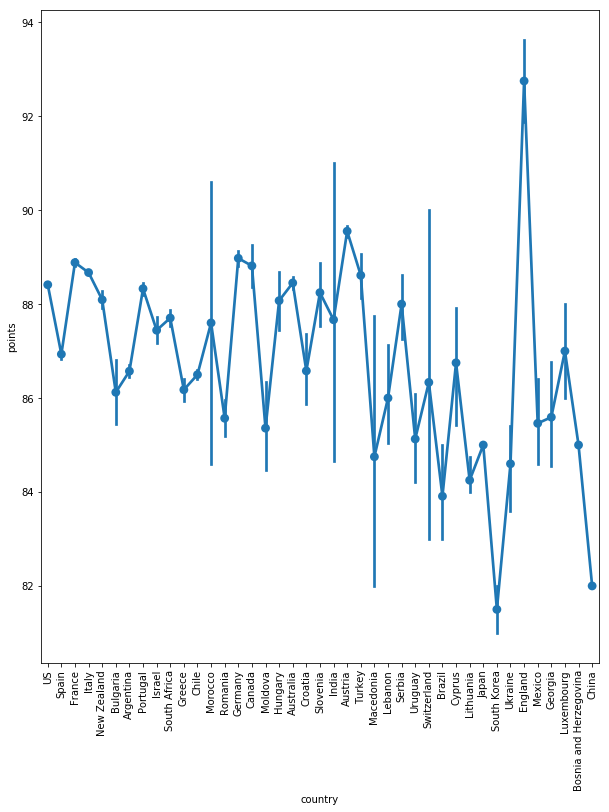

In [15]:
sns.pointplot(x="country", y="points", data=wr)
plt.xticks(rotation=90)

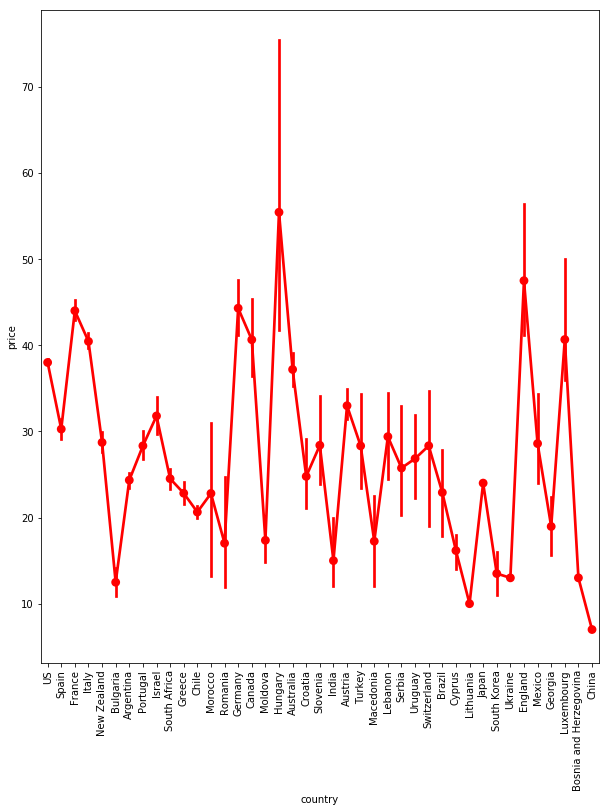

In [16]:
sns.pointplot(x="country", y='price',color='Red',data=wr)
plt.xticks(rotation=90)
plt.rcParams['figure.figsize']=(20,18)

Since point plot gives us the mean of the data present in that interval, we can infer that Hungary has the maximum mean points and price while China being the lowest.

#### Pair Plot

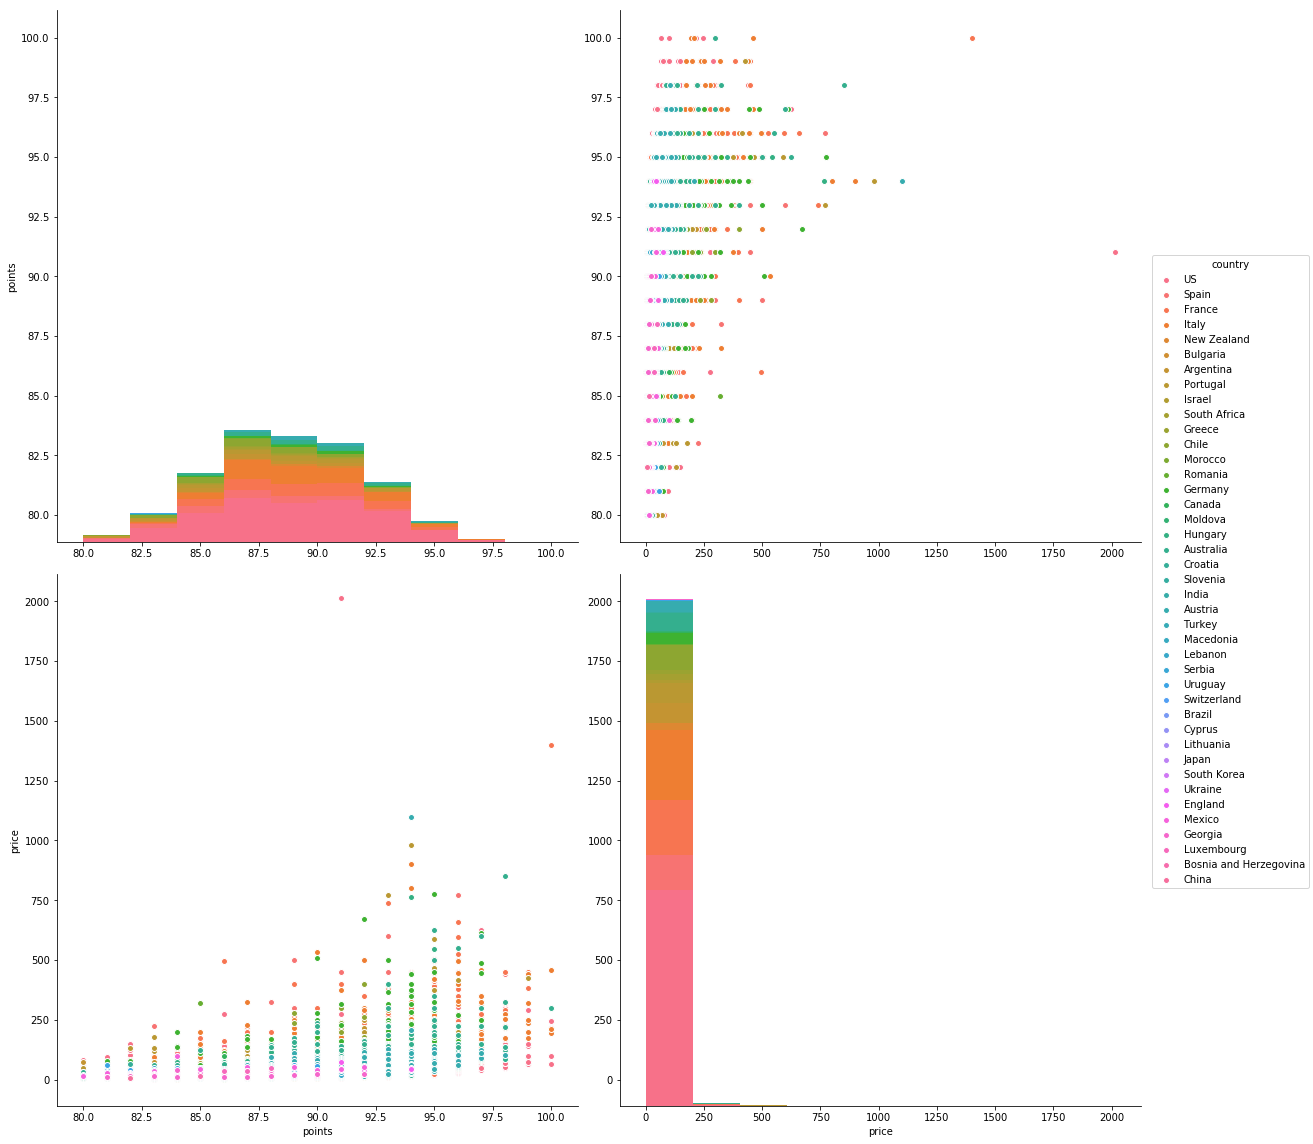

In [17]:
sns.pairplot(wr,hue='country',size=8)

The pair plot represents the plots between the numeric values. Since the existing dataset contains only 2 numeric values, The number of plots are 4.
We can see that there are few outliers that are very far away from other points which changes the plot.


#### Line Plot

<Container object of 3 artists>

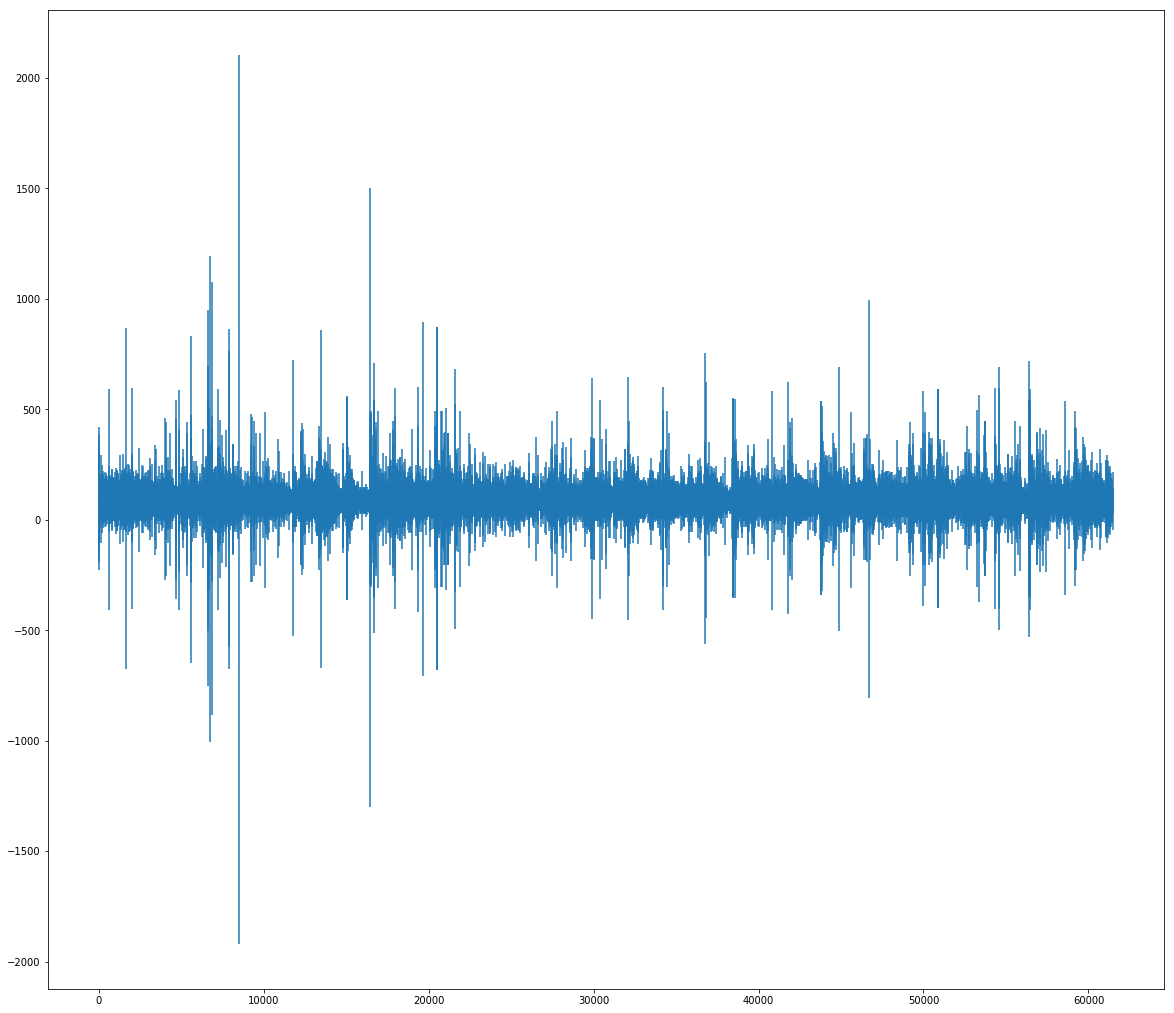

In [18]:
plt.errorbar(range(len(wr)),wr['points'],yerr=wr['price'])

#### Box Plot  

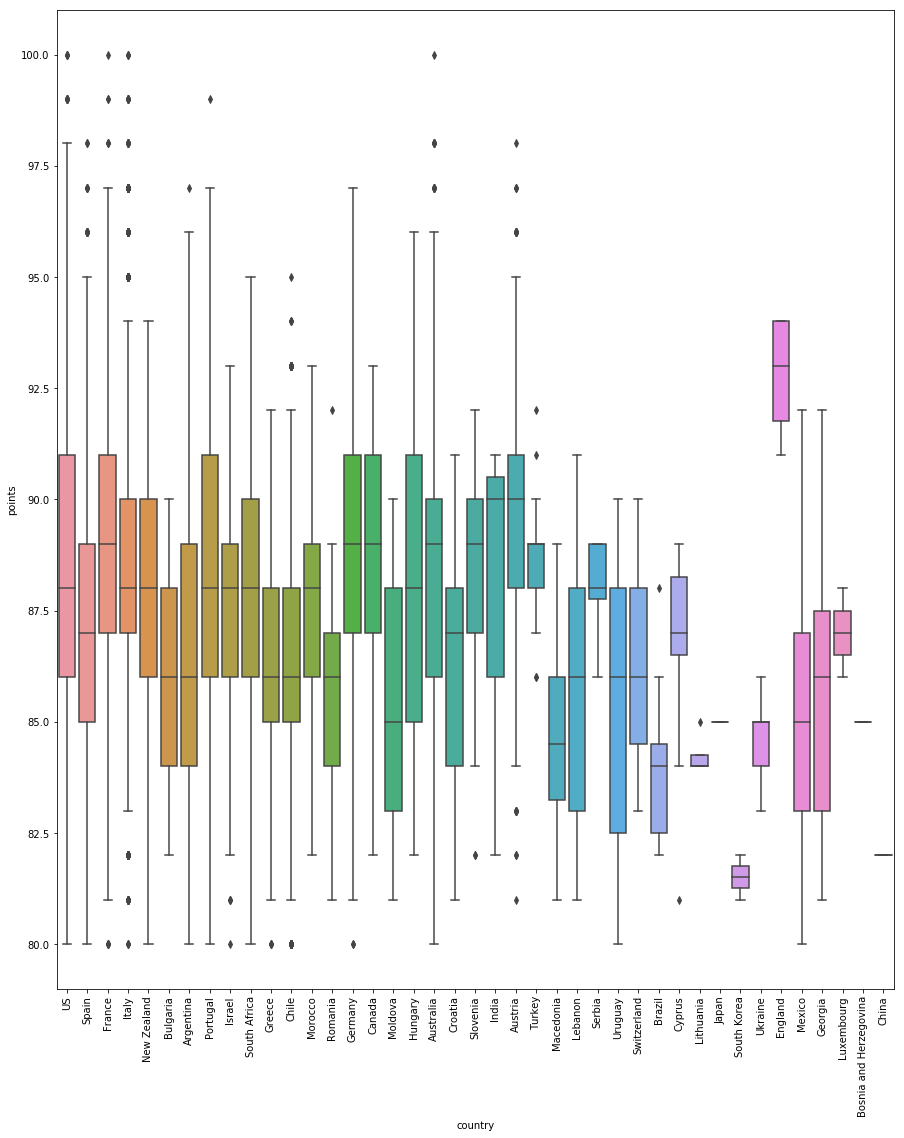

In [27]:
sns.boxplot(x='country',y='points',data=wr)
plt.xticks(rotation=90)
plt.rcParams['figure.figsize']=(15,18)

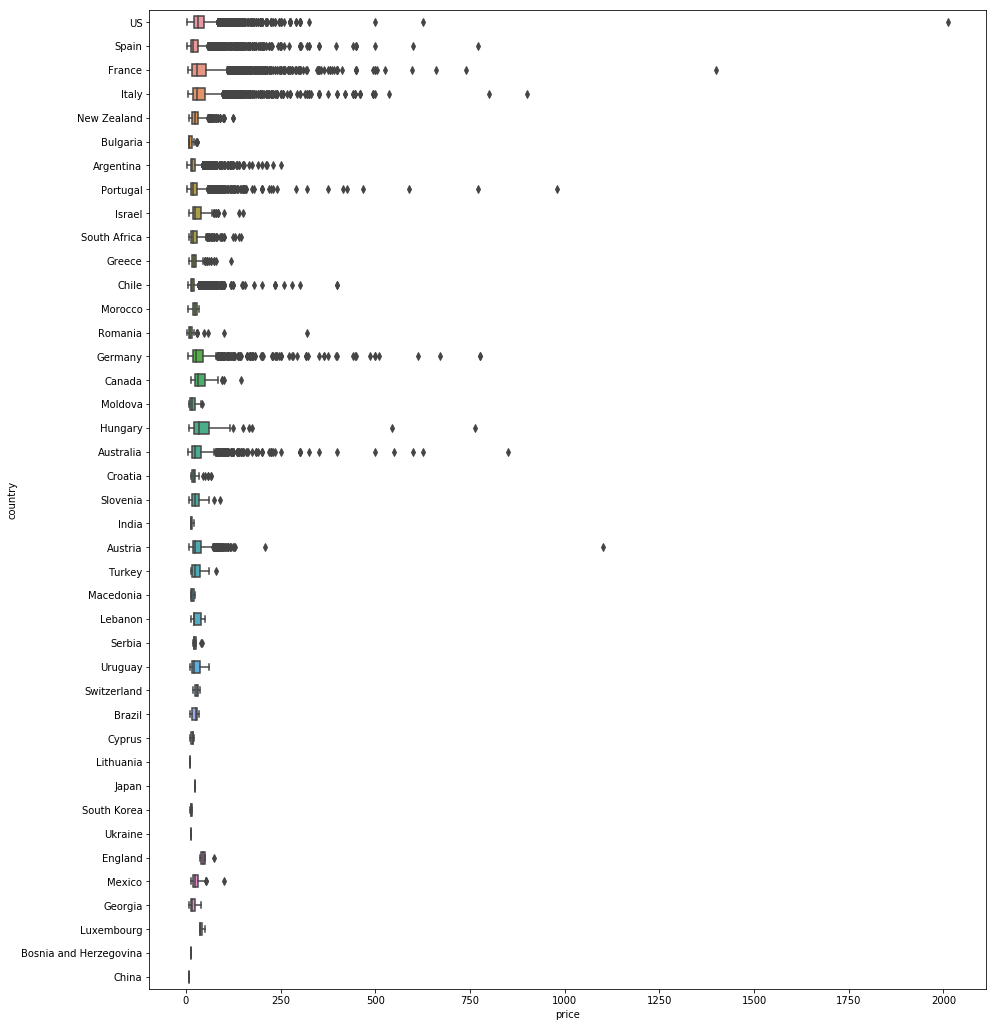

In [20]:
sns.boxplot(x='price',y='country',data=wr,width=0.5)
plt.rcParams['figure.figsize']=(10,20)

From the Box plot we can infer that there are few outliers present in the price vs province plot because of which the plot is diminished. 
The small dots that are not present in the box and whiskers plots are the outliers which are the points that lies beyond the 4th quartile. From the plot we can clearly see the outliers.

#### Summary of Dataset

In [18]:
wr.describe()

,points,price
count,61493.000000,61493.000000
mean,88.215569,36.167190
std,3.230052,36.398429
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,27.000000
75%,90.000000,45.000000
max,100.000000,2013.000000


In [19]:
w=wr.groupby('country')
summary=w['points','price'].describe(include='all')
summary

points                                          \
                          count       mean       std   min    25%   50%   
country                                                                   
Argentina                2412.0  86.571725  3.200645  80.0  84.00  86.0   
Australia                2113.0  88.450544  3.018337  80.0  86.00  89.0   
Austria                  1365.0  89.551648  2.478886  81.0  88.00  90.0   
Bosnia and Herzegovina      1.0  85.000000       NaN  85.0  85.00  85.0   
Brazil                     11.0  83.909091  1.868397  82.0  82.50  84.0   
Bulgaria                   41.0  86.121951  2.282489  82.0  84.00  86.0   
Canada                    113.0  88.814159  2.429538  82.0  87.00  89.0   
Chile                    3120.0  86.498077  2.683830  80.0  85.00  86.0   
China                       1.0  82.000000       NaN  82.0  82.00  82.0   
Croatia                    45.0  86.577778  2.632739  81.0  84.00  87.0   
Cyprus                     12.0  86.750000  2.378884  81.0  86.50  87.0   
England                     8.0  92.750000  1.388730  91.0  91.75  93.0   
France                   6743.0  88.883583  3.043968  80.0  87.00  89.0   
Georgia                    27.0  85.592593  3.028826  81.0  83.00  86.0   
Germany                  1393.0  88.976310  2.969217  80.0  87.00  89.0   
Greece                    380.0  86.176316  2.088533  80.0  85.00  86.0   
Hungary                   109.0  88.073394  3.340843  82.0  85.00  88.0   
India                       3.0  87.666667  4.932883  82.0  86.00  90.0   
Israel                    309.0  87.443366  2.437704  80.0  86.00  88.0   
Italy                    8592.0  88.671439  2.764944  80.0  87.00  88.0   
Japan                       1.0  85.000000       NaN  85.0  85.00  85.0   
Lebanon                    23.0  86.000000  2.730301  81.0  83.00  86.0   
Lithuania                   4.0  84.250000  0.500000  84.0  84.00  84.0   
Luxembourg                  3.0  87.000000  1.000000  86.0  86.50  87.0   
Macedonia                   4.0  84.750000  3.304038  81.0  83.25  84.5   
Mexico                     39.0  85.461538  2.863988  80.0  83.00  85.0   
Moldova                    39.0  85.358974  2.986700  81.0  83.00  85.0   
Morocco                     5.0  87.600000  4.037326  82.0  86.00  88.0   
New Zealand               805.0  88.091925  2.556135  80.0  86.00  88.0   
Portugal                 2434.0  88.328266  2.978807  80.0  86.00  88.0   
Romania                    93.0  85.569892  2.029124  81.0  84.00  86.0   
Serbia                      8.0  88.000000  1.069045  86.0  87.75  88.0   
Slovenia                   41.0  88.243902  2.244777  82.0  87.00  89.0   
South Africa              775.0  87.704516  2.391667  80.0  86.00  88.0   
South Korea                 2.0  81.500000  0.707107  81.0  81.25  81.5   
Spain                    4253.0  86.933694  3.209131  80.0  85.00  87.0   
Switzerland                 3.0  86.333333  3.511885  83.0  84.50  86.0   
Turkey                     31.0  88.612903  1.333602  86.0  88.00  89.0   
US                      26088.0  88.412144  3.425973  80.0  86.00  88.0   
Ukraine                     5.0  84.600000  1.140175  83.0  84.00  85.0   
Uruguay                    39.0  85.128205  3.045095  80.0  82.50  86.0   

                                        price                              \
                          75%    max    count       mean        std   min   
country                                                                     
Argentina               89.00   97.0   2412.0  24.341625  23.150747   4.0   
Australia               90.00  100.0   2113.0  37.193090  46.041829   6.0   
Austria                 91.00   98.0   1365.0  32.981685  34.884629   8.0   
Bosnia and Herzegovina  85.00   85.0      1.0  13.000000        NaN  13.0   
Brazil                  84.50   88.0     11.0  22.909091   9.213626  11.0   
Bulgaria                88.00   90.0     41.0  12.487805   5.635255   8.0   
Canada                  91.00  

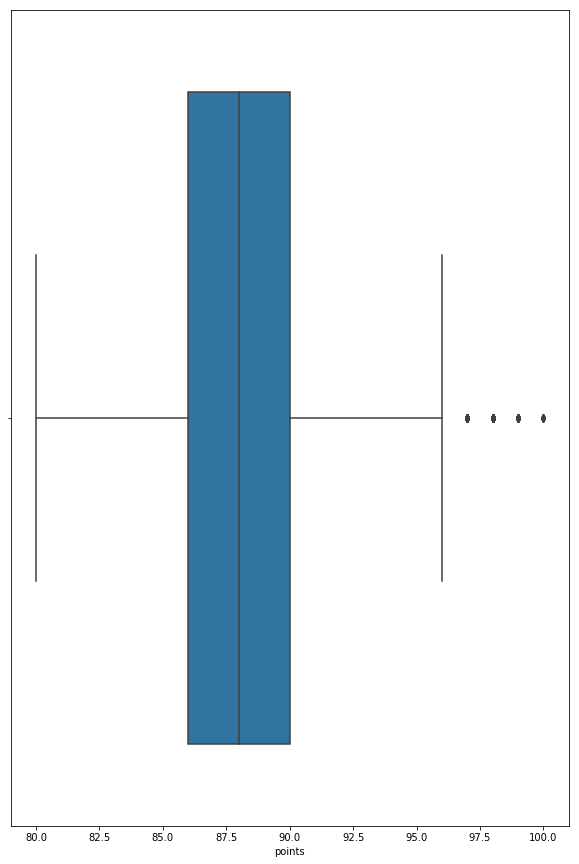

In [24]:
#Box Plot of entire dataset
sns.boxplot(x='points',data=wr)
plt.rcParams['figure.figsize']=(10,15)

From the Box plot we can infer that the lowest points that the critic has given is 80. The 1st quartile ranges from 80 to 86 which states that 25% of the points lies within this range.
The 2nd quartile ranges from 86 to 88, The 3rd quartile ranges from 88 and 92 and the last 25% of points lies within the range of 92 and 98. The points beyond that are the outliers.

The distribution of the data acros the dataset can be clearly seen with the help of table mentioned above.
- Count represents the number of rows present in the table. Since the numbers are same we can say that there are no null values in the table
- If we consider the table that has statistics of the entire dataset, Points has mean of 88.31 and Price has mean of 37.91.
- If we consider the table that has statistics of the entire dataset, Points has std of 3.28 and Price has std of 35.98.
- If we consider the table that has statistics of the entire dataset, Points has min of 80 and Price has min of 4. 
- If we consider the table that has statistics of the entire dataset, Points has max of 100 and Price has max of 2013.
- If we consider the table that has statistics of the entire dataset, 25th ,50th and 75th percentile of Points has the values 86,88 and 91 respectively whereas Price has 18, 30 and 45 respectively.


In [21]:
#save the cleaned file
wr.to_csv("wine_reviews_cleaned.csv",index=False)